In [23]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from network import ConstantBirthNode, DynamicBirthNode, Network
from reactions import Reactions, CmeParameters, OdeParameters
from simulate import simulate_gillespie, simulate_ode
from analysis import CmeSimResults

#### Set up the Chain

In [133]:
'''Specify parameters'''
DIFFUSION = 0.01
BIRTHRATE = 0.1
DEATHRATE = 0.1
TARGETPOP = 10
CONTROLSTRENGTH = 0.1
DELTA = 0.5


'''Set up the network topology'''
chain = Network()

# Add feeder node
chain.add_node(ConstantBirthNode(deathrate=0,birthrate=DIFFUSION))

# Add chain
CHAINLENGTH = 98
for _ in range(CHAINLENGTH):
    chain.add_node(DynamicBirthNode(deathrate=DEATHRATE, birthrate=BIRTHRATE, targetpop=TARGETPOP, controlstrength=CONTROLSTRENGTH, delta=DELTA))
    chain.add_transport(chain.node_ids[-2], chain.node_ids[-1], rate = DIFFUSION) # Add transport from most recent node

# Add sink node
chain.add_node(ConstantBirthNode(deathrate=1,birthrate=0))
chain.add_transport(chain.node_ids[-2], chain.node_ids[-1], rate = DIFFUSION)

'''Infer the reactions in the network'''
reactions = Reactions(chain)

'''Check the network (optional)'''
# Check the network
# print("Nodes in the Network:")
# for node in chain.nodes: 
#     print(node)

# print("\nEdges in the network:")
# for s, d, data in chain.edges(data=True):
#     print(s,'->', d, 'rate:', data['rate'])

# print("\nReactions:")
# for reaction in reactions.reactions:
#     print(reaction)

'Check the network (optional)'

#### Set the starting state and time points for the simulation

In [134]:
MAX_T = 10000
TIME_POINTS = np.linspace(0, MAX_T, 10001)

# Start by populating with only wildtype
start_statevec = chain.get_empty_statevector()
for i in range(chain.n_nodes):
    start_statevec[i*2] = TARGETPOP
# Set last node to empty
start_statevec[-3:-1] = 0

# Populate cells with full mutants
start_statevec[5] = 20
start_statevec[4] = 0

print("Starting State:")
print(start_statevec)

Starting State:
[10  0 10  0  0 20 10  0 10  0 10  0 10  0 10  0 10  0 10  0 10  0 10  0
 10  0 10  0 10  0 10  0 10  0 10  0 10  0 10  0 10  0 10  0 10  0 10  0
 10  0 10  0 10  0 10  0 10  0 10  0 10  0 10  0 10  0 10  0 10  0 10  0
 10  0 10  0 10  0 10  0 10  0 10  0 10  0 10  0 10  0 10  0 10  0 10  0
 10  0 10  0 10  0 10  0 10  0 10  0 10  0 10  0 10  0 10  0 10  0 10  0
 10  0 10  0 10  0 10  0 10  0 10  0 10  0 10  0 10  0 10  0 10  0 10  0
 10  0 10  0 10  0 10  0 10  0 10  0 10  0 10  0 10  0 10  0 10  0 10  0
 10  0 10  0 10  0 10  0 10  0 10  0 10  0 10  0 10  0 10  0 10  0 10  0
 10  0 10  0 10  0  0  0]


#### Simulate ODE

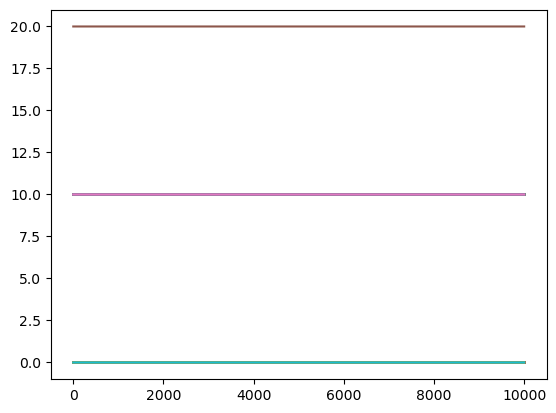

End State:
[10.  0. 10.  0.  0. 20. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0.
 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0.
 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0.
 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0.
 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0.
 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0.
 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0.
 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0.
 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0.
 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0.
 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0. 10.  0.
  0.  0.]


In [135]:
ode_param = OdeParameters(reactions)
#print(ode_param)

ode_results = simulate_ode(ode_param, TIME_POINTS, start_statevec)

fig, ax = plt.subplots()
ax.plot(TIME_POINTS, ode_results.T)
plt.show()

print("End State:")
print(ode_results.T[-1])

### Simulate CME using Gillespie

Simulating using gillespie...


100%|██████████| 100/100 [02:47<00:00,  1.67s/it]


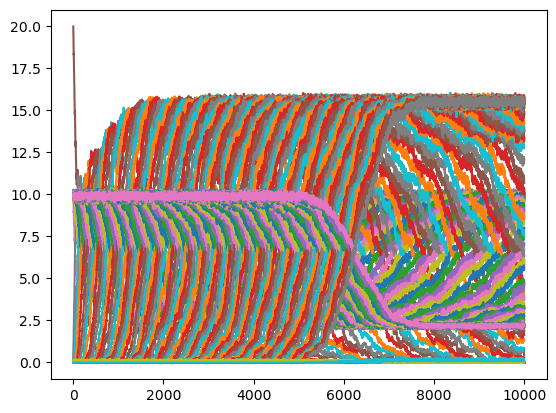

End State:
[ 9.71  0.    9.98  0.    9.87  0.    9.91  0.    9.74  0.    9.87  0.
 10.01  0.   10.04  0.   10.01  0.    9.83  0.    9.88  0.    9.91  0.
  9.98  0.   10.03  0.    9.91  0.   10.12  0.   10.07  0.    9.81  0.
  9.93  0.   10.04  0.    9.97  0.    9.91  0.   10.03  0.    9.84  0.
  9.86  0.    9.89  0.    9.63  0.    9.94  0.    9.92  0.    9.93  0.
 10.07  0.    9.73  0.   10.    0.    9.94  0.    9.9   0.    9.89  0.
 10.03  0.    9.63  0.    9.85  0.    9.67  0.    9.92  0.07  9.78  0.26
  9.7   0.41  9.55  0.79  9.43  0.81  9.3   1.33  9.    1.64  9.08  1.89
  8.83  2.22  8.32  3.18  8.    3.86  7.46  4.73  7.01  5.86  6.7   6.35
  6.13  7.52  5.68  8.66  4.76 10.28  4.54 10.68  3.77 12.07  3.52 12.76
  3.23 13.55  3.32 13.19  3.2  13.74  2.95 13.76  2.95 14.28  2.78 14.26
  2.53 14.93  2.38 15.13  2.19 15.19  2.19 15.63  2.16 15.64  2.17 15.35
  2.24 15.67  2.18 15.23  2.2  15.66  2.18 15.39  2.23 15.66  2.14 15.62
  2.19 15.54  2.25 15.64  2.26 15.79  2.21 15.6   2.

In [137]:
cme_param = CmeParameters(reactions)
#print(cme_param)

REPLICATES = 100
gill_results = simulate_gillespie(cme_param, TIME_POINTS, start_statevec, REPLICATES)
gill_results = CmeSimResults(gill_results)

fig, ax = plt.subplots()
ax.plot(TIME_POINTS, gill_results.average.T)
plt.show()
print("End State:")
print(gill_results.average.T[-1])

##### Copy number over time

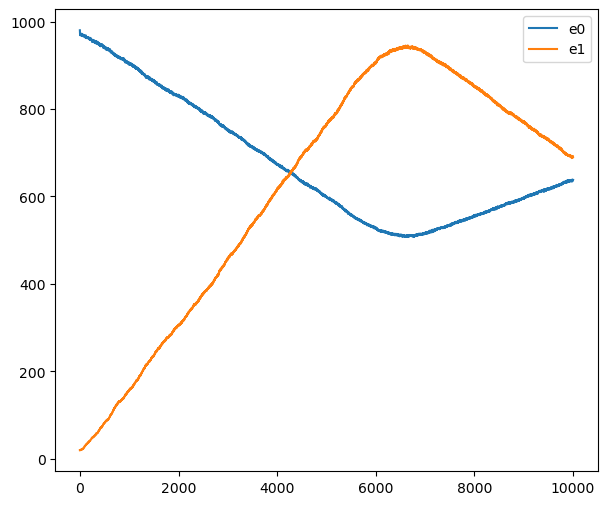

In [139]:
plt.figure(figsize=(7, 6))
plt.plot(TIME_POINTS, np.mean(gill_results.e0_count, axis = 0), label = 'e0')
plt.plot(TIME_POINTS, np.mean(gill_results.e1_count, axis = 0), label = 'e1')
plt.legend()
plt.show()

##### Heteroplasmy over time

(100, 10001)


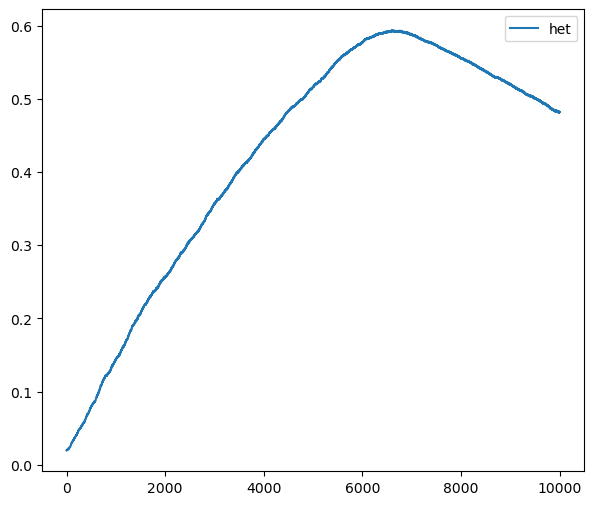

In [140]:
heteroplasmies = gill_results.e1_count/(gill_results.e0_count+gill_results.e1_count)
print(heteroplasmies.shape)

plt.figure(figsize=(7, 6))
plt.plot(TIME_POINTS, np.mean(heteroplasmies,axis = 0), label = 'het')
plt.legend()
plt.show()

##### Heteroplasmy profile over time

/tmp/ipykernel_31506/1090838143.py:1: RuntimeWarning: invalid value encountered in divide
  het_per_comp = gill_results.statevec_e1/(gill_results.statevec_e0+gill_results.statevec_e1)
/tmp/ipykernel_31506/1090838143.py:2: RuntimeWarning: Mean of empty slice
  het_per_comp = np.nanmean(het_per_comp,axis = 0)


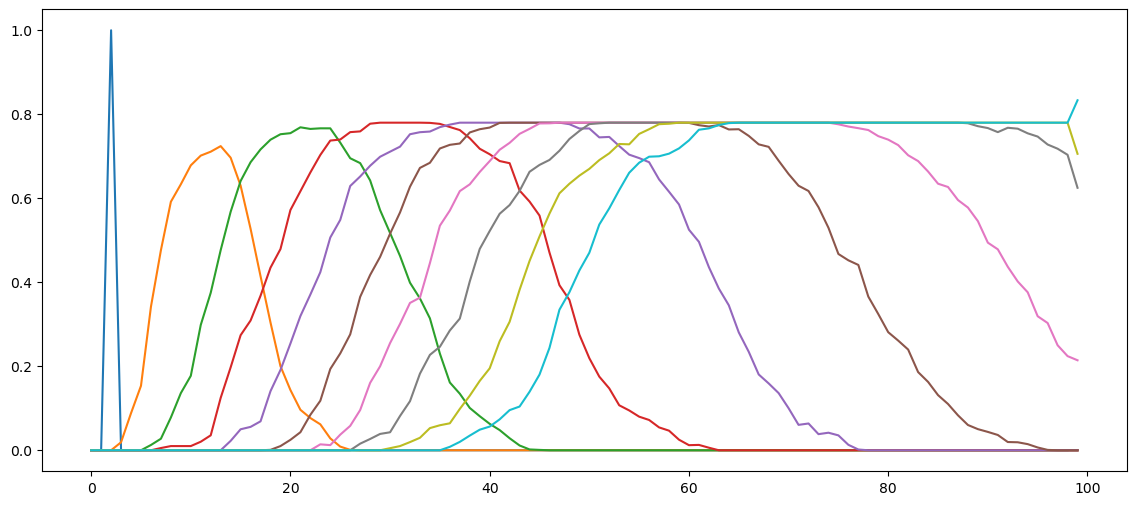

In [146]:
het_per_comp = gill_results.statevec_e1/(gill_results.statevec_e0+gill_results.statevec_e1)
het_per_comp = np.nanmean(het_per_comp,axis = 0)
plt.figure(figsize=(14, 6))
for i in range(10):
    time_index = int(i*(len(TIME_POINTS)/10))
    plt.plot(het_per_comp[:,time_index], label = f't={TIME_POINTS[time_index]}')
plt.show()

##### Copy number profile over time

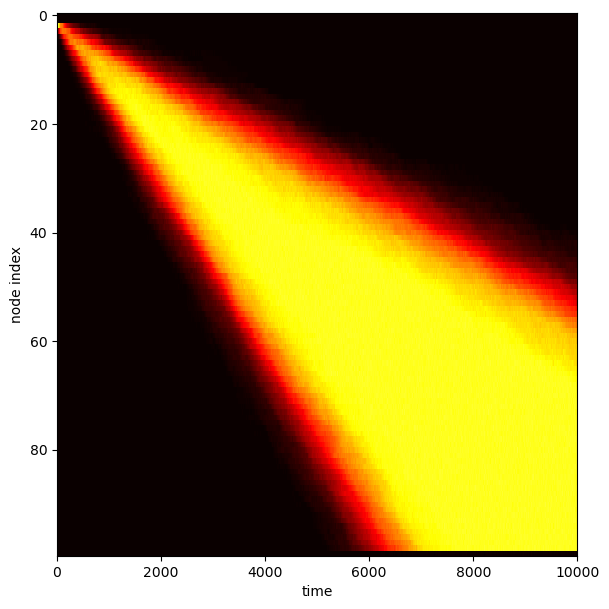

In [148]:

prof = np.mean(gill_results.statevec_e1,axis=0)
plt.figure(figsize=(6, 6))
plt.imshow(prof, cmap='hot',aspect='auto',interpolation='none')
plt.tight_layout()
plt.ylabel('node index')
plt.xlabel('time')
plt.show()